## （一）探索性数据分析及可视化

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus
import os
from IPython.display import Image
from sklearn import tree

import matplotlib.pyplot as plt
data = pd.read_excel("./spambase.xls")
# 数据的探索性分析、数值型的统计描述
print(data.describe())

                 0         0.64       0.64.1          0.1         0.32  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      0.104576     0.212922     0.280578     0.065439     0.312222   
std       0.305387     1.290700     0.504170     1.395303     0.672586   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.382500   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

               0.2          0.3          0.4          0.5          0.6  ...  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000  ...   
mean      0.095922     0.114233     0.105317     0.090087     0.239465  ...   
std       0.273850     0.391480     0.401112     0.278643     0.644816  ...   
min       0.00000

### 选取几个重要的变量分析

In [2]:
data.columns=list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ123456')
data.rename(columns={'5':'capital_run_length_total', '4':'capital_run_length_longest','3':'capital_run_length_average',
                  '2':'freq_CHAR0','1':'freq_CHAR1','a':'freq_WORD0','d':'freq_WORD1','6':'type'}, inplace = True)
data.head(10)

,freq_WORD0,b,c,freq_WORD1,e,f,g,h,i,j,...,W,X,Y,Z,freq_CHAR1,freq_CHAR0,capital_run_length_average,capital_run_length_longest,capital_run_length_total,type
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,...,0.00,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


### 柱状图：垃圾邮件占比39.4%

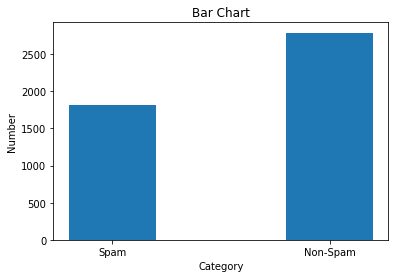

In [3]:
x = ['Spam','Non-Spam']
y = [len(data[data['type']==1]),len(data[data['type']==0])]
plt.bar(range(len(x)),y,0.4,align = 'center')
plt.xticks(range(len(x)),x)
#设置横坐标的文字说明
plt.xlabel('Category')
#设置纵坐标的文字说明
plt.ylabel('Number')
#设置标题
plt.title('Bar Chart')
#绘图
plt.show()

### 相关性分析

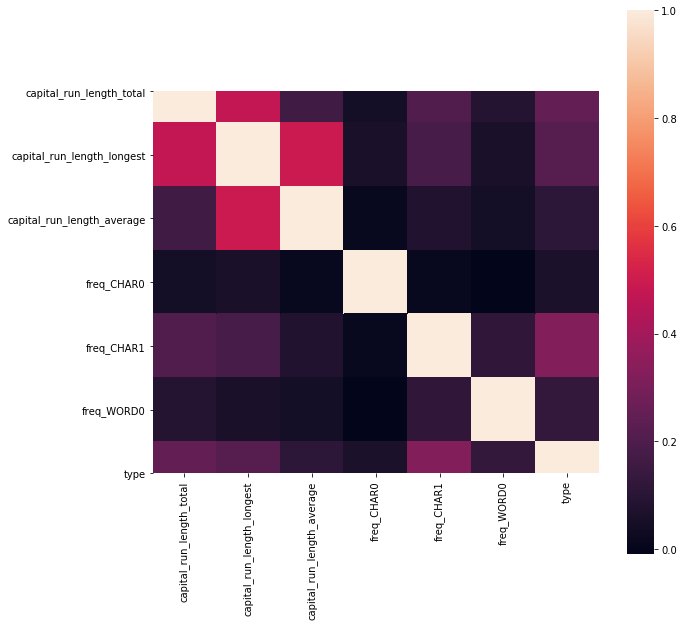

In [41]:
data1=data[['capital_run_length_total','capital_run_length_longest','capital_run_length_average','freq_CHAR0','freq_CHAR1','freq_WORD0','type']]
plt.figure(figsize=(10, 10))
sns.heatmap(data1.corr(), square=True)
plt.show()

#### "capital_run_length_longest","capital_run_length_average"的相关性达到了0.5左右，可能不符合朴素贝叶斯假设，影响拟合效果

### 箱线图

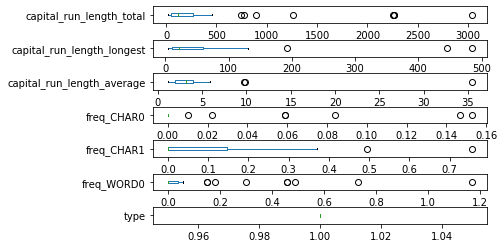

In [46]:
fig,axes = plt.subplots(7, 1)
data1.loc[1:50].plot(kind='box', vert=False, ax=axes, subplots=True)
fig.subplots_adjust(wspace=1, hspace=1) 

<function matplotlib.pyplot.show(*args, **kw)>

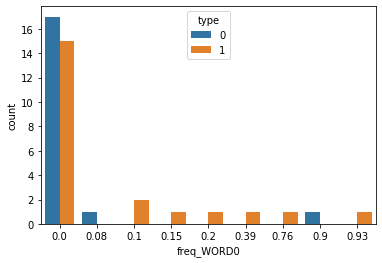

In [47]:
sns.countplot(x='freq_WORD0', hue="type", data=data)
plt.show

## （二）朴素贝叶斯分类算法进行分类

 *   分别由前57个描述变量（X1,X2,...X57)来决定邮件的分类结果,Xi有取值xij（j取1到m,i取1到57）。类别属性Y包含0，1两种。
 *   新的样本记作X=（a1,a2,...a57)。
 *   最终要求判断P（0｜X）、P(1|X)哪个更大。
 *   由贝叶斯定理：P（Y｜X）=P（X｜Y）P(Y)/P(X),此时之要求比较分子大小，故而只需要求P（a1,a2,...a57｜0）P(0)和求P（a1,a2,...a57｜1）P(1)，即求P(y)P(a1|y)P(a2|y)...P(a57|y),y取0或1。

In [5]:
data_0 = np.loadtxt("./spambase.txt", delimiter=",")#此时导入数据类型为dataframe
DATA = np.array(data_0)  
np.random.shuffle(DATA)#随机打乱样本
class Bayes(object):
    def Group(self):
        labels = DATA[0:4500,DATA.shape[1]-1]        #取前4500行 为训练集，最后一列是因变量Y
        DATA0 = DATA[0:4500,0:DATA.shape[1]-1]   #除了最后一列是自变量X
        return DATA0, labels

    def classify(self, DATA0, labels, features):
        #求P(Y=0)和P(Y=1)
        labels = list(labels)    
        labelset = set(labels) #去重后只有0和1两类邮箱
        P_y = {}       #将P(Y)存成一个字典
        for label in labelset:
            P_y[label] = labels.count(label)/float(len(labels))   # P(Y=i)=i在labels中出现的次数/labels的总长度
            

        #设features=(a1_1,a2_3,...a57_2),求P(a1_1,y)...P(a57_2,y),y取0、1
        P_xy = {}
        for y in P_y.keys():
            y_index = [i for i, label in enumerate(labels) if label == y]  # labels中出现y值的所有数值的 所有行数
            for j in range(len(features)):      # features的第j个元素在训练集第j列出现时的 所有行数
                x_index = [i for i, feature in enumerate(DATA0[:,j]) if feature == features[j]]
                xy_count = len(set(x_index) & set(y_index))   # 列出相同的行数
                pkey = str(features[j]) + '*' + str(y)
                P_xy[pkey] = xy_count / float(len(labels))
                

        #求P(a1_1|y)...P(a57_2|y),y取0、1
        P = {}
        for y in P_y.keys():
            for x in features:
                pkey = str(x) + '|' + str(y)
                P[pkey] = P_xy[str(x)+'*'+str(y)] / float(P_y[y])    #P(a1_1|y) = P(a1_1,y)/P(y)
                

        #求P(a1_1,a2_3,...a57_2,y)
        F = {}   
        for y in P_y:
            F[y] = P_y[y]
            for x in features:
                F[y] = F[y]*P[str(x)+'|'+str(y)]     #P[y/X] = P[X/y]*P[y]/P[X]，分母相等，比较分子即可，所以有F=P[X/y]*P[y]=P[x1/Y]*P[x2/Y]*P[y]
               
          #返回P(Y|X)中最大的那一个Y
        return max(F, key=F.get)

In [6]:
if __name__ == '__main__':
    b = Bayes()
    # 训练数据
    DATA0, labels = b.Group()
    # 测试集
    DATA1 = DATA[4501:,0:DATA.shape[1]-1]
    # 对测试集分类
    result=np.zeros(np.shape(DATA1)[0])
    for k in range(np.shape(DATA1)[0]):
        result[k] = b.classify(DATA0, labels, DATA1[k])
    print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### 使用sklearn评估

In [10]:
# 导入模型评估模块
from sklearn import metrics
# mean absolute error
from sklearn.metrics import explained_variance_score
y_true = DATA[4501:,DATA.shape[1]-1]
y_pred = result
explained_variance_score(y_true, y_pred) 
#mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred) 

0.32

## Model Assessment

* 评价：误差平方为0.32，故其预测结果有一定借鉴意义。模型对缺失数据不太敏感，算法也比较简单。



* 缺陷：


 （1）朴素贝叶斯模型假设属性之间相互独立在Spambase数据中不成立，邮件属性个数比较多而且有些属性之间相关性较大，分类效果并不十分理想。而在属性相关性较小时，朴素贝叶斯性能最为良好。

 （2）我们可以假定有一些单词很少分开出现，这样将导致分类器不准确。例如，在一个文档中Boston出现了5次而San Francisco只出现了3次，那么更加倾向于将文档归于San Francisco(6次)而不是Boston(5次)。




* 改进：针对第一个缺点有半朴素贝叶斯之类的算法通过考虑部分关联性适度改进；面对第二种缺陷可以考虑权重归一化


## (三）利用sklearn中的GBDT进行分类

In [15]:
# 导入GBDT
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()
gbdt.fit(DATA[0:4500,0:DATA.shape[1]-1], DATA[0:4500,DATA.shape[1]-1])


# 预测测试集
gbdt_pred = gbdt.predict(DATA1)

模型在测试集上的准确率0.920000


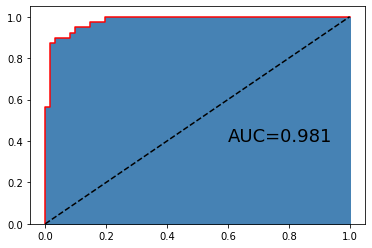

In [18]:
import matplotlib.pyplot as plt
# 模型得分
print('模型在测试集上的准确率%f' %gbdt.score(DATA1,y_true))

# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_true, gbdt.predict_proba(DATA1)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'steelblue')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

## Model Assessment

* 评价：

（1）测试的准确率高达92%。


（2）其AUC(Area under the ROC curve)的值高达0.981。AUC高意味着：在二分类的情况下，这种机器学习模型的分类性能十分理想。